# ▒ 의사결정나무 ▒

## 0. 환경설정

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz  # 나무 결과 시각화 할 때 필요한 것
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns   # 팽귄데이터를 seabon에서 제공해주기 때문에

## 1. 데이터 준비

### Penguin dataset

- 펭귄에 대한 데이터
- species: 펭귄 종류 (Chinstrap, Adelie, Gentoo)
- island: 남극섬 종류
- bill_length_mm: culmen length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: 물갈퀴 길이 (mm)
- body_mass_g: 몸무게 (g)
- sex: 성별

In [ ]:
penguins = sns.load_dataset('penguins')
print(penguins.shape)
penguins.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 데이터 전처리

- 펭귄의 종을 예측하자. 
- 결측치는 평균값으로 대체한다.
- 범주형 변수는 가변수로 대체

In [ ]:
penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean(), inplace=True)
penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean(), inplace=True)

penguins['sex'] =penguins['sex'].apply(lambda x: 1 if x == 'MALE' else 0)
penguins['Biscoe'] = penguins['island'].apply(lambda x: 1 if x == 'Biscoe' else 0)
penguins['Dream'] = penguins['island'].apply(lambda x: 1 if x == 'Dream' else 0)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1,0,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0,0,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0,0,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0,0,0


### 데이터 분할
- 전체 데이터를 7:3으로 분할하여 각각 학습 데이터, 시험 데이터로 사용한다.

In [ ]:
colnames = ['bill_length_mm','bill_depth_mm',
            'flipper_length_mm','body_mass_g','sex',
           'Biscoe','Dream']
X = penguins[colnames]
y = penguins.iloc[:,0]

In [ ]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = \                                  # \를 하면 다음줄까지 고려해라
train_test_split(X, y, test_size = 0.3, random_state=123)

## 2. 의사결정나무

### tree 생성

In [ ]:
pen_tree = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 3,
                             random_state = 0).fit(X_train, y_train)     

#### 시각화

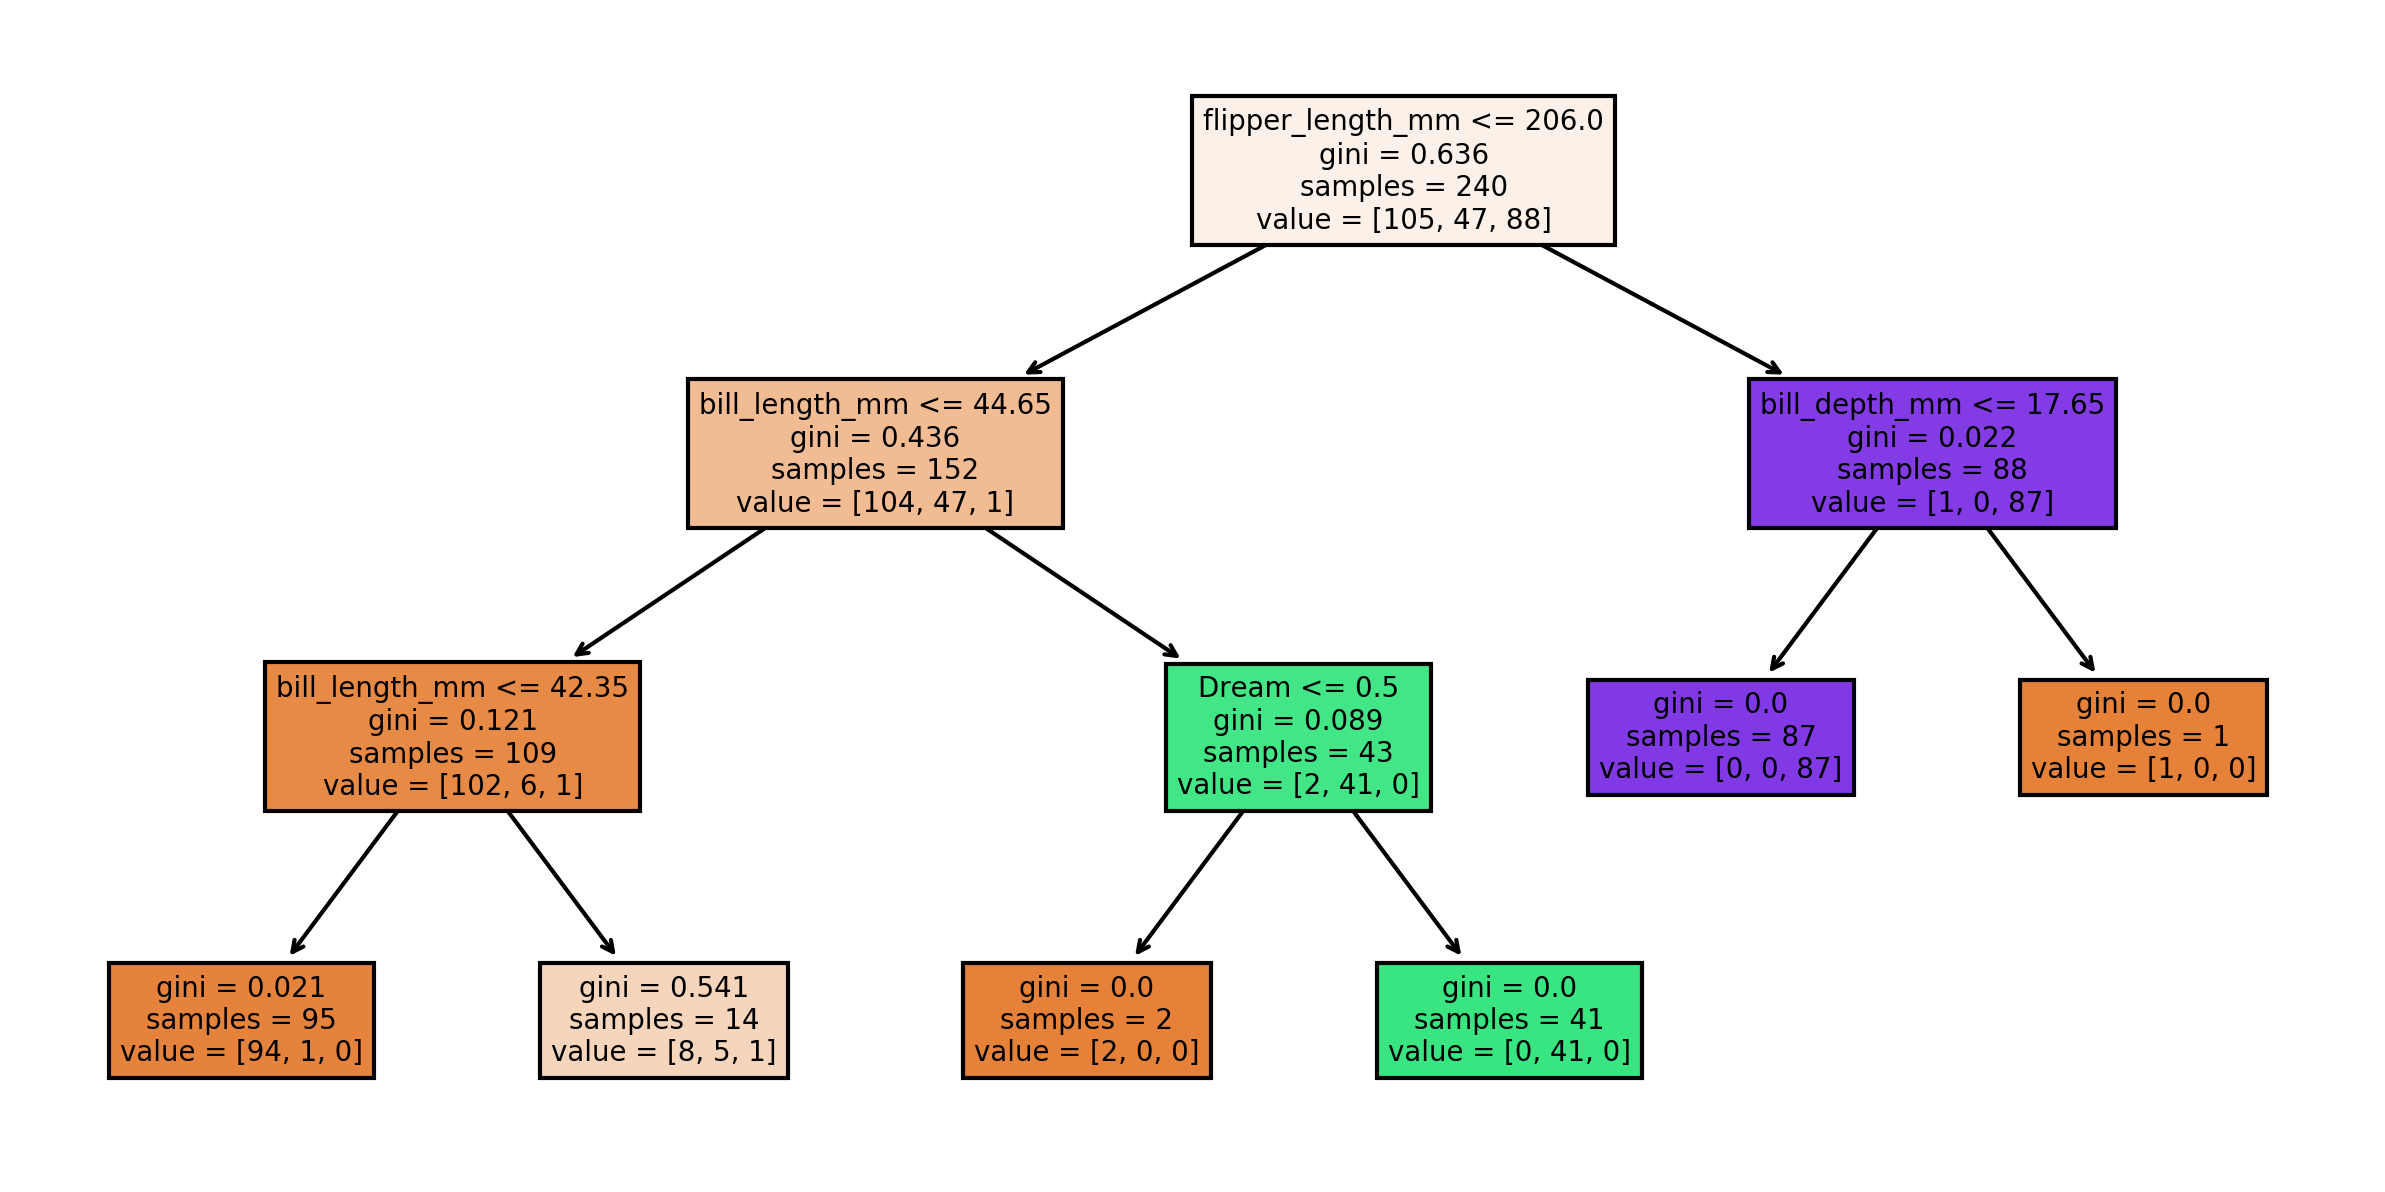

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5), dpi = 300)
plotResult = sklearn.tree.plot_tree(pen_tree,
                                    feature_names = colnames,
                                   filled = True)

### 예측

In [ ]:
print(pen_tree.score(X_test, y_test))
pred_y = pen_tree.predict(X_test)
print(confusion_matrix(y_test, pred_y))

0.9423076923076923
[[47  0  0]
 [ 5 16  0]
 [ 1  0 35]]
